In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read and print the data

df = pd.read_csv('covtype.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
# Split data into training and testing groups

from sklearn.model_selection import train_test_split
features = df[df.columns[0:len(df.columns)-1]]
labels = df[df.columns[len(df.columns)-1]]
X_train, X_test, Y_train, Y_test = train_test_split(features, labels,
    test_size=0.30)
X_train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
381393,3364,306,16,750,114,993,174,229,195,2112,...,0,1,0,0,0,0,0,0,0,0
196020,3279,229,5,430,53,5545,212,245,170,1471,...,0,0,0,0,0,0,0,0,0,0
524079,3226,321,19,323,99,1892,169,218,188,1989,...,0,0,1,0,0,0,0,0,0,0
258533,2031,65,27,210,22,242,233,174,55,242,...,0,0,0,0,0,0,0,0,0,0
255059,3326,226,17,700,104,3560,195,254,192,2568,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Standardize the data

from sklearn import preprocessing
'''
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)
X_train_std
'''
#Standardize the data

from sklearn import preprocessing

data_to_standardize_train = X_train[X_train.columns[0:10]]
data_to_standardize_test = X_test[X_test.columns[0:10]]
std_scale = preprocessing.MinMaxScaler().fit(data_to_standardize_train)
X_train_std = std_scale.transform(data_to_standardize_train)
X_test_std = std_scale.transform(data_to_standardize_test)
X_train_std = np.concatenate([X_train_std, X_train[X_train.columns[10:]]], axis = 1)
X_test_std = np.concatenate([X_test_std, X_test[X_test.columns[10:]]], axis = 1)

In [5]:
# Learn
from sklearn.linear_model import LogisticRegression
import time
time_start = time.time()
clf = LogisticRegression(solver="sag", max_iter= 400)
clf.fit(X_train_std, Y_train)  
print("--- %s seconds ---" % (time.time() - time_start))


--- 76.64589524269104 seconds ---


In [6]:
clf.score(X_test, Y_test)

0.036258490912428859

In [7]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = clf.predict(X_test_std)
conf_mat = confusion_matrix(Y_test,y_pred)
print(confusion_matrix(Y_test, y_pred))

[[44005 18320    60     0     7     0  1238]
 [14978 67376  1946     1   107   137   103]
 [    0  1175  9245    97     0   231     0]
 [    0     0   539   192     0    96     0]
 [   42  2534   243     0    43     1     0]
 [    0  1900  3009    17     9   333     0]
 [ 2917    36    24     0     0     0  3343]]


In [8]:
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

          1       0.71      0.69      0.70     63630
          2       0.74      0.80      0.77     84648
          3       0.61      0.86      0.72     10748
          4       0.63      0.23      0.34       827
          5       0.26      0.02      0.03      2863
          6       0.42      0.06      0.11      5268
          7       0.71      0.53      0.61      6320

avg / total       0.70      0.71      0.70    174304



In [9]:
df_nocorr = df.drop(['Hillshade_3pm', 'Horizontal_Distance_To_Hydrology','Wilderness_Area1', 'Slope'], axis = 1)
features = df_nocorr[df_nocorr.columns[0:len(df_nocorr.columns)-1]]
labels = df_nocorr[df_nocorr.columns[len(df_nocorr.columns)-1]]
X_train, X_test, Y_train, Y_test = train_test_split(features, labels,
    test_size=0.30)

In [10]:
data_to_standardize_train = X_train[X_train.columns[0:10]]
data_to_standardize_test = X_test[X_test.columns[0:10]]
std_scale = preprocessing.MinMaxScaler().fit(data_to_standardize_train)
X_train_std = std_scale.transform(data_to_standardize_train)
X_test_std = std_scale.transform(data_to_standardize_test)
X_train_std = np.concatenate([X_train_std, X_train[X_train.columns[10:]]], axis = 1)
X_test_std = np.concatenate([X_test_std, X_test[X_test.columns[10:]]], axis = 1)

In [11]:
time_start = time.time()
clf = LogisticRegression(solver="sag", max_iter= 400)
clf.fit(X_train_std, Y_train)  
print("--- %s seconds ---" % (time.time() - time_start))

--- 83.12053799629211 seconds ---


In [12]:
y_pred = clf.predict(X_test_std)
print(confusion_matrix(Y_test, y_pred))

[[43286 18987    55     0     4     0  1347]
 [15239 67571  2116     2    74    41   106]
 [    0  1105  9141    76     2   157     0]
 [    0     0   592   167     0    60     0]
 [   28  2514   263     0    26     0     0]
 [    0  1798  3183    16     4   211     0]
 [ 2794    32    29     0     0     0  3278]]


In [13]:
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

          1       0.71      0.68      0.69     63679
          2       0.73      0.79      0.76     85149
          3       0.59      0.87      0.71     10481
          4       0.64      0.20      0.31       819
          5       0.24      0.01      0.02      2831
          6       0.45      0.04      0.07      5212
          7       0.69      0.53      0.60      6133

avg / total       0.70      0.71      0.69    174304



In [14]:
clf.score(X_test, Y_test)

0.035185652652836422

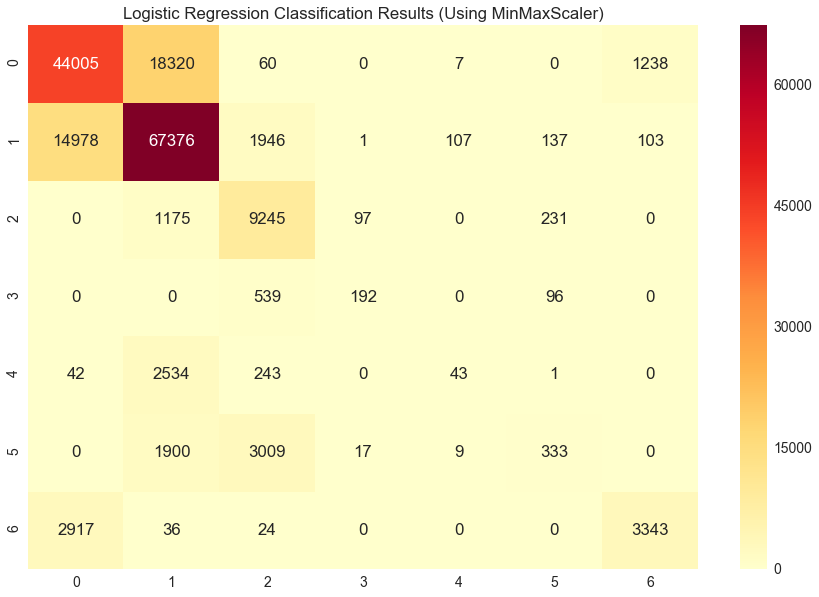

In [19]:
import seaborn as sns
%matplotlib inline
df_cm = pd.DataFrame(conf_mat)
plt.figure(figsize = (15,10))
plt.title('Logistic Regression Classification Results (Using MinMaxScaler)')
sns.set(font_scale =1.4)
sns.heatmap(df_cm, annot = True, fmt = 'g', cmap = 'YlOrRd')
plt.savefig('lr.jpeg')